### Question 2

#### Imports

In [21]:
from numpy.ma.core import sqrt, ones, zeros, mean, std, sort, floor, log
from scipy import stats
import matplotlib.pyplot as plt

#### One-factor model template

In [10]:
# One factor model
def simOneFactor(n, PD, EAD, LGD, rho):
    normDist = stats.norm(0, 1)
    z = normDist.rvs(1)  # systematic factor
    y = normDist.rvs(n)  # idiosyncratic factor
    rtilde = sqrt(rho)*z + sqrt(1-rho)*y # Asset values for obligors
    c = normDist.ppf(PD) # Critical thresholds for obligors
    default = (rtilde < c)
    losses = default * EAD * LGD
    return sum(losses), sum(default)

#### Simulation

In [25]:
# The bank portfolios
portfolios = {
    "ANB AMOR": {
        "n": 8000,
        "EAD": ones(8000),
        "LGD": 0.25 * ones(8000),
        "PD": 0.01 * ones(8000),
        "rho": 0.25,
    },
    "NSN": {
        "n": 1017,
        "EAD": ones(1000).tolist() + [10]*10 + [50]*4 + [100]*2 + [500],
        "LGD": 0.5 * ones(1017),
        "PD": 0.02 * ones(1017),
        "rho": 0.25,
    },
    "ROBA": {
        "n": 1017,
        "EAD": ones(1000).tolist() + [10]*10 + [50]*4 + [100]*2 + [500],
        "LGD": 0.5 * ones(1017),
        "PD": ([0.0275]*1000 + [0.02]*10 + [0.0175]*4 + [0.015]*2 + [0.008]),
        "rho": 0.25,
    },
}

In [30]:
# Parameters
runs = 5000 # Number of simulation runs.
alpha = 0.99 # alpha-value

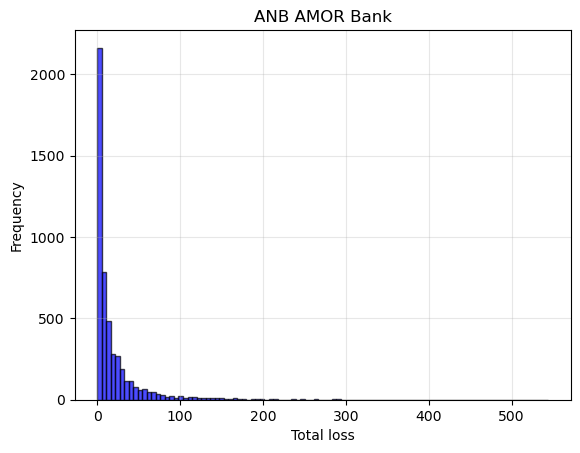

Portfolio of ANB AMOR bank
Expected loss (EL): 19.87 (18.88, 20.87)
Unexpected loss (UL): 35.81 (34.82, 36.81)
Value-at-Risk (VaR): 177.0 (176.01, 177.99)
Economic capital (EC): 157.13 (156.13, 158.12)
Tail conditional expectation (TCE): 249.23 (248.24, 250.22)




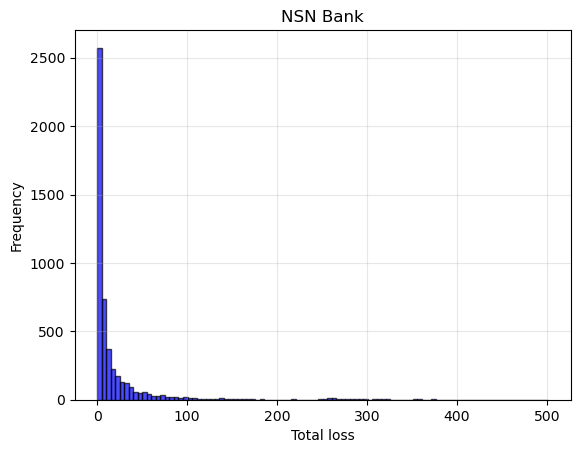

Portfolio of NSN bank
Expected loss (EL): 20.24 (18.9, 21.58)
Unexpected loss (UL): 48.28 (46.94, 49.61)
Value-at-Risk (VaR): 281.0 (279.66, 282.34)
Economic capital (EC): 260.76 (259.42, 262.1)
Tail conditional expectation (TCE): 342.35 (341.01, 343.69)




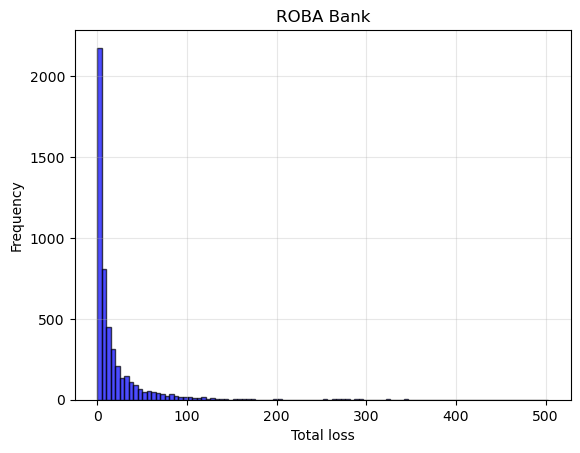

Portfolio of ROBA bank
Expected loss (EL): 19.08 (18.07, 20.09)
Unexpected loss (UL): 36.43 (35.42, 37.43)
Value-at-Risk (VaR): 173.5 (172.49, 174.51)
Economic capital (EC): 154.42 (153.41, 155.43)
Tail conditional expectation (TCE): 283.62 (282.61, 284.63)




In [ ]:
# The simulation for each portfolio
for p in portfolios:
    n = portfolios[p]["n"]
    EAD = portfolios[p]["EAD"]
    LGD = portfolios[p]["LGD"]
    PD = portfolios[p]["PD"]
    rho = portfolios[p]["rho"]
    
    losses = zeros(runs)
    defaults = zeros(runs)
    for i in range(runs):
        loss, default = simOneFactor(n, PD, EAD, LGD, rho)
        losses[i] = loss
        defaults[i] = default
    
    # Histogram total loss distribution
    plt.figure()   # create a new plot window
    plt.hist(losses, bins=100, color='blue',alpha=0.7,  edgecolor='black')
    plt.title(f"{p} Bank")
    plt.xlabel("Total loss")
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.show()

    # Calculate metrics
    EL = mean(losses)
    UL = std(losses)
  
    sortLosses = sort(losses)
    idx = int(floor(alpha * runs))
    VaR = sortLosses[idx] # Value-at-risk

    EC = VaR - EL # Economical capital
    TCE = mean(losses[losses > VaR]) # Tail conditional expectation

    # Confidence intervals (95%)
    z = 1.96
    EL_CI = [round(EL - z * (UL / sqrt(runs)), 2), round(EL + z * (UL / sqrt(runs)), 2)]
    UL_CI = [round(UL - z * (UL / sqrt(runs)), 2), round(UL + z * (UL / sqrt(runs)), 2)]
    VaR_CI = [round(VaR - z * (UL / sqrt(runs)), 2), round(VaR + z * (UL / sqrt(runs)), 2)]
    EC_CI = [round(EC - z * (UL / sqrt(runs)), 2), round(EC + z * (UL / sqrt(runs)), 2)]
    TCE_CI = [round(TCE - z * (UL / sqrt(runs)), 2), round(TCE + z * (UL / sqrt(runs)), 2)]

    # Print results with confidence intervals
    print(f"Portfolio of {p} bank")
    print(f"Expected loss (EL): {round(EL, 2)} ({EL_CI[0]}, {EL_CI[1]})")
    print(f"Unexpected loss (UL): {round(UL, 2)} ({UL_CI[0]}, {UL_CI[1]})")
    print(f"Value-at-Risk (VaR): {round(VaR, 2)} ({VaR_CI[0]}, {VaR_CI[1]})")
    print(f"Economic capital (EC): {round(EC, 2)} ({EC_CI[0]}, {EC_CI[1]})")
    print(f"Tail conditional expectation (TCE): {round(TCE, 2)} ({TCE_CI[0]}, {TCE_CI[1]})")
    print("\n")